<a href="https://colab.research.google.com/github/srivennela-128/OIB-SIP/blob/main/Project_2_Proposal_Level_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q scikit-learn pandas matplotlib seaborn xgboost joblib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')   # follow the auth prompt
# create a folder for the project if you'd like:
!mkdir -p /content/drive/MyDrive/wine_project/models
!mkdir -p /content/drive/MyDrive/wine_project/plots

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()   # 👈 choose your WineQT.csv file


Saving WineQT.csv to WineQT (1).csv


In [ ]:
import os
# Try common locations; change path if needed
candidates = [
    '/content/WineQT.csv',
    '/content/WineQT.csv',           # add more if you used another name
    '/content/drive/MyDrive/WineQT.csv',
    '/content/drive/MyDrive/wine_project/WineQT.csv',
    '/content/drive/MyDrive/wine_project/WineQT.csv'
]

DATA_PATH = None
for p in candidates:
    if os.path.exists(p):
        DATA_PATH = p
        break

if DATA_PATH is None:
    raise FileNotFoundError("Wine CSV not found. Upload the file via Colab UI or put it in your Drive and update the path.")
print("Using:", DATA_PATH)

Using: /content/WineQT.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load
df = pd.read_csv(DATA_PATH)
print("Shape:", df.shape)
df.head()

Shape: (1143, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


Missing values per column:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64
Quality value counts:
 quality
3      6
4     33
5    483
6    462
7    143
8     16
Name: count, dtype: int64


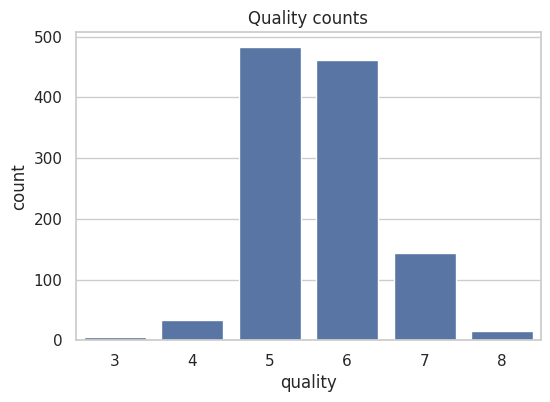

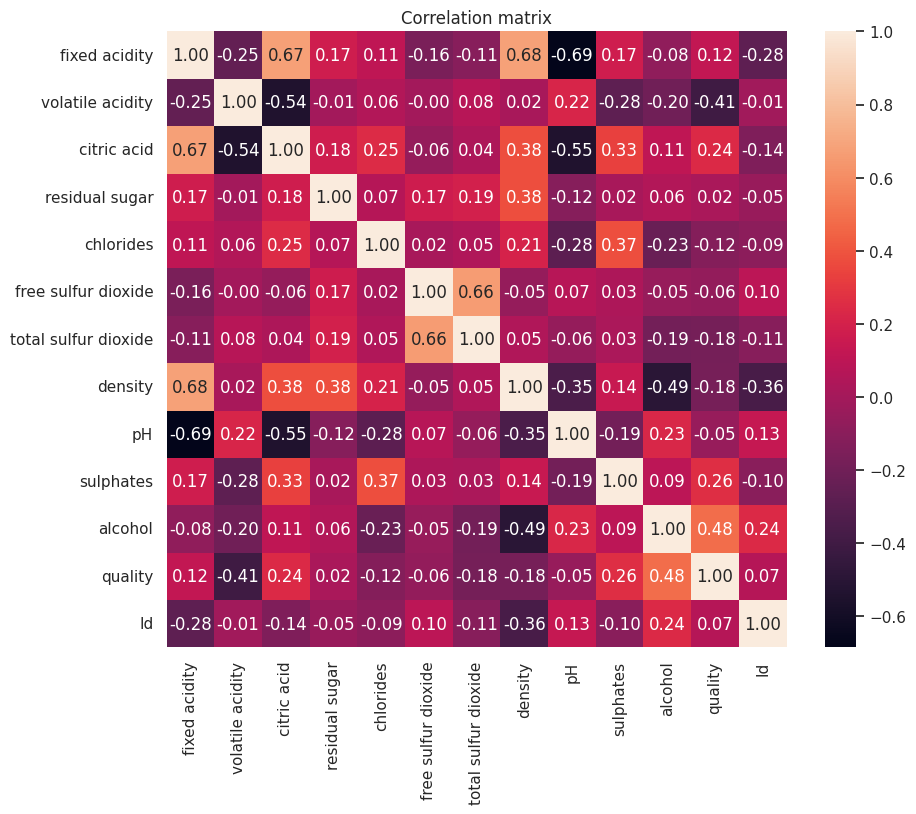

In [ ]:
df.info()
display(df.describe().T)
print("Missing values per column:\n", df.isnull().sum())
print("Quality value counts:\n", df['quality'].value_counts().sort_index())

# small plots
plt.figure(figsize=(6,4))
sns.countplot(x='quality', data=df)
plt.title('Quality counts')
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Correlation matrix')
plt.show()

In [ ]:
TARGET = 'quality'
X = df.drop(columns=[TARGET])
y = df[TARGET]

from sklearn.model_selection import train_test_split
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

print("Train/Test shapes:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Train/Test shapes: (914, 12) (229, 12) (914,) (229,)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(y_true, y_pred, name="model"):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} -> RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")
    return {'rmse': rmse, 'mae': mae, 'r2': r2}

# Linear
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
pred_lr = lr.predict(X_test_scaled)
evaluate_model(y_test, pred_lr, "LinearRegression")

# Ridge (example you used)
ridge = Ridge(alpha=1.0, random_state=RANDOM_STATE)
ridge.fit(X_train_scaled, y_train)
pred_ridge = ridge.predict(X_test_scaled)
evaluate_model(y_test, pred_ridge, "Ridge")

# Random Forest (no scaling required but scaled input is fine)
rf = RandomForestRegressor(n_estimators=200, random_state=RANDOM_STATE)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
evaluate_model(y_test, pred_rf, "RandomForest")

# XGBoost
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, random_state=RANDOM_STATE)
xg_reg.fit(X_train, y_train)
pred_xgb = xg_reg.predict(X_test)
evaluate_model(y_test, pred_xgb,
               "XGBoost")


LinearRegression -> RMSE: 0.6184, MAE: 0.4800, R2: 0.3128
Ridge -> RMSE: 0.6183, MAE: 0.4799, R2: 0.3130
RandomForest -> RMSE: 0.5486, MAE: 0.4128, R2: 0.4591
XGBoost -> RMSE: 0.5805, MAE: 0.3987, R2: 0.3944


{'rmse': np.float64(0.5804964349031019),
 'mae': 0.39873650670051575,
 'r2': 0.3944430351257324}

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold

pipe = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge(random_state=RANDOM_STATE))])
param_grid = {'ridge__alpha': [0.01, 0.1, 1.0, 10, 50]}

cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
grid = GridSearchCV(pipe, param_grid, cv=cv, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best params (Ridge):", grid.best_params_, "Best CV score (neg RMSE):", grid.best_score_)
best_ridge = grid.best_estimator_
pred_best_ridge = best_ridge.predict(X_test)
evaluate_model(y_test, pred_best_ridge,"Tuned Ridge")

Best params (Ridge): {'ridge__alpha': 50} Best CV score (neg RMSE): -0.6571665185750928
Tuned Ridge -> RMSE: 0.6137, MAE: 0.4787, R2: 0.3232


{'rmse': np.float64(0.6136855714334296),
 'mae': 0.478669647754783,
 'r2': 0.3232196562302744}